# Javier Palomares Homework 1 a

## Programming Questions


In [5]:
import numpy as np



### Question 1

Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.


In [7]:
numSamples = 1000
mean1 = -10
stdDev1 = 5
samples1 = np.random.normal(mean1,stdDev1,numSamples)
mean2 = 10
stDev2 = 5
samples2 = np.random.normal(mean2,stDev2,numSamples)


#### Part a
Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points. What do you observe? 

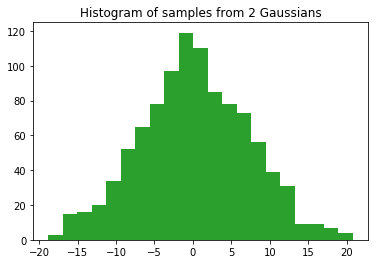

In [14]:
samplesSum = samples1+samples2
import matplotlib.pyplot as plt
plt.hist(samplesSum, bins='auto')
plt.title('Histogram of samples from 2 Gaussians')
plt.show()

 I observed a Gaussian distribution centered around 0. It also looks like the standard deviation is greater than 5.

#### Part b
Estimate the mean and the variance of the sum


I estimate the mean is 0, and the variance is around 7<sup>2</sup>. I estimated this visually from the histogram



In [33]:
print('Mean:') 
print(np.mean(samplesSum))
print("Variance")
print(np.var(samplesSum))


Mean:
0.258182226109
Variance
50.4801070795


### Question 2: Central Limit Theorem
 Let Xi be an iid Bernoulli random variable with value {-1,1}. Look at the random variable Zn = 1 nPXi. By taking 1000 draws from Zn, plot its histogram.Check that for small n (say, 5-10) Zn does not look that much like a Gaussian, but when n is bigger (already by the time n = 30 or 50) it looks much more like a Gaussian. Check also for much bigger n: n = 250, to see that at this point, one can really see the bell curve.


#### Small n

In [30]:
from scipy.stats import bernoulli
x = [-1,1]
p = .5
n = 5
bernoulli.rvs(x,p,size=100)

ValueError: size does not match the broadcast shape of the parameters.

### Question 3
Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

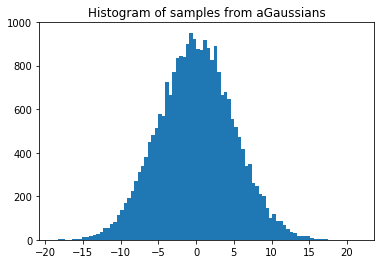

In [36]:
numSamples = 25000
mean = 0
stdDev = 5
samples = np.random.normal(mean,stdDev,numSamples)
plt.hist(samples, bins='auto')
plt.title('Histogram of samples from aGaussians')
plt.show()

Visually, I estimate the mean is 0, and the stdDev is around 5.

Computing the mean and standard deviation from elemental operations, I found:

In [45]:
sum = 0
for i in range(numSamples):
    sum += samples[i]
mean = sum / numSamples

variance = 0
for i in range(numSamples):
    variance += (samples[i] - mean)**2
variance /= numSamples


In [46]:
print("Mean:")
print(mean)
print("Standard Deviation:")
print(np.sqrt(variance))

Mean:
0.0122267213038
Standard Deviation:
4.99347391761


### Question 4
Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution.
Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).


In [94]:
numSamples = 10000
mean = [-5,5]
covarianceMatrix = [[20, .8], [.8, 30]]
samples = np.random.multivariate_normal(mean, covarianceMatrix, numSamples)
X = samples[:,0]
Y = samples[:,1]

#Covariance_x_y  E [ (X - E[x]]) (Y - E[Y]) ]
meanX = 0
meanY = 0
for i in range(numSamples):
    meanX += X[i]
    meanY += Y[i]
meanX /= numSamples
meanY /= numSamples

#Covariance_x_y  E [ (X - E[x]]) (Y - E[Y]) ]
def covXY(X,Y,meanX,meanY):
    numSamples = len(X)
    cov = 0
    for j in range(numSamples):
        cov += (X[j] - meanX)*(Y[j] - meanY)
    cov /= numSamples
    return cov


cov = [[covXY(X,X,meanX,meanY), covXY(X,Y,meanX,meanY)],
       [covXY(Y,X,meanY,meanX), covXY(Y,Y,meanY,meanY)]]
print("Mean X:")
print(meanX)
print("Mean Y:")
print(meanY)
print("Covariance Matrix:")
print(cov)

Mean X:
-5.01493904107
Mean Y:
4.97822835445
Covariance Matrix:
[[20.177346281857659, 0.98924184308385921], [0.98924184308385921, 29.940075549143732]]
